In [1]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from normalize import *
from pca_plots import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ROSMAP_PATH = 'ROSMAP_clinical.csv'
CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ROSMAP_data = pd.read_csv(ROSMAP_PATH)
ct_counts_metadata: ad.AnnData = ad.read_h5ad(CT_COUNTS_META_PATH)

ROSMAP_data = ROSMAP_data.convert_dtypes()
ct_counts_metadata.obs = ct_counts_metadata.obs.convert_dtypes()

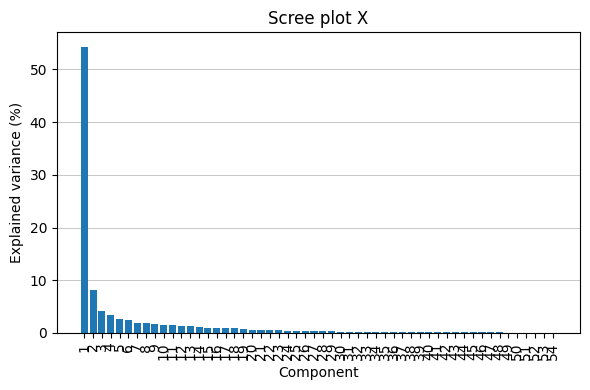

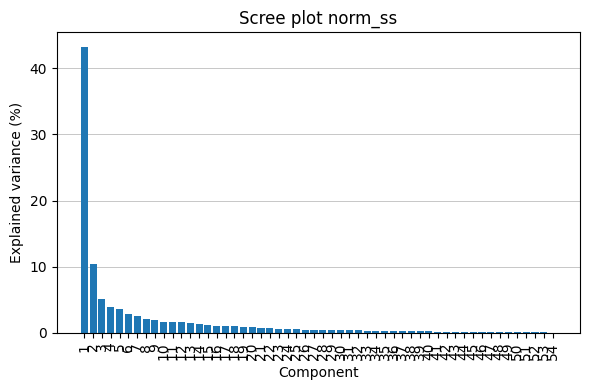

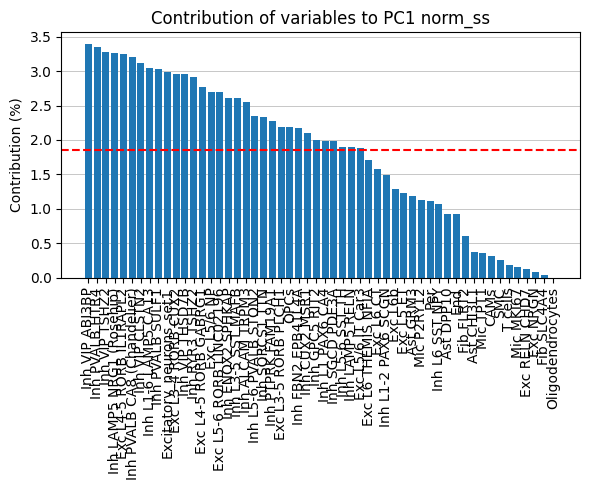

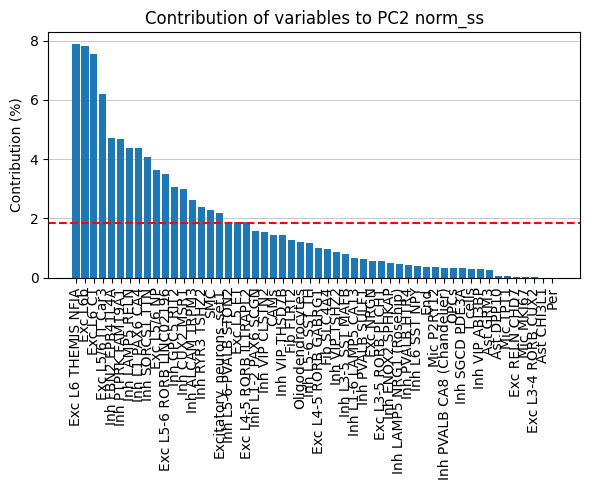

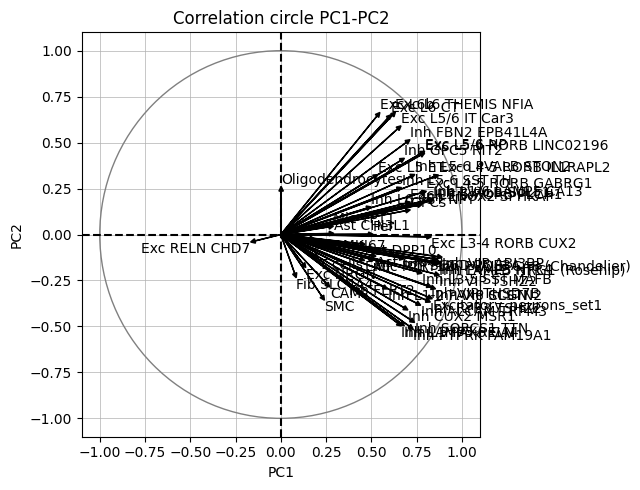

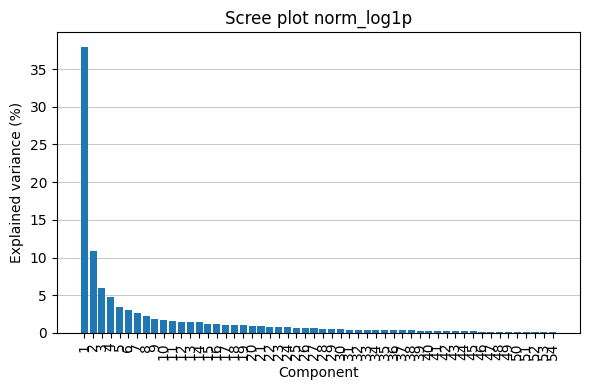

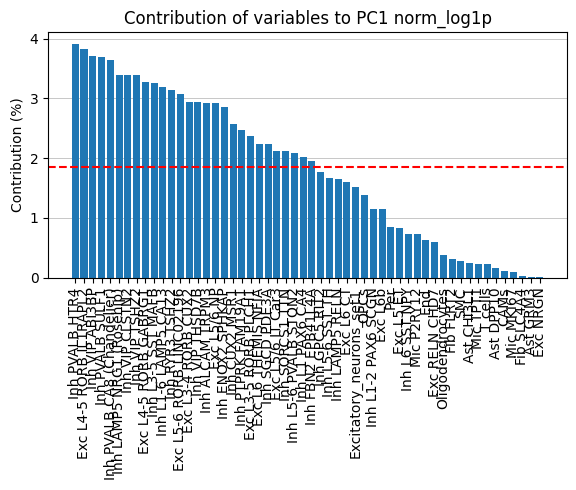

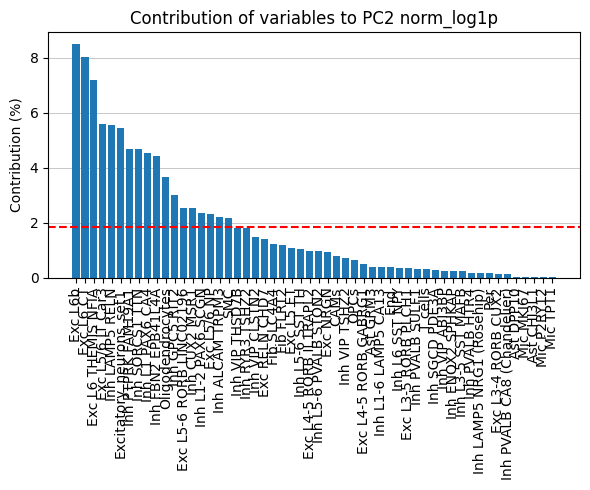

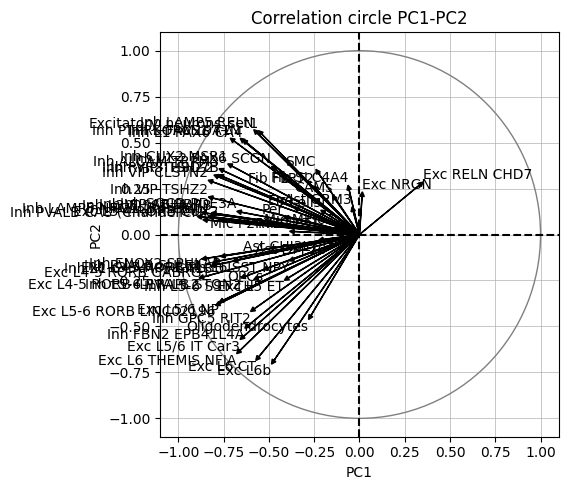

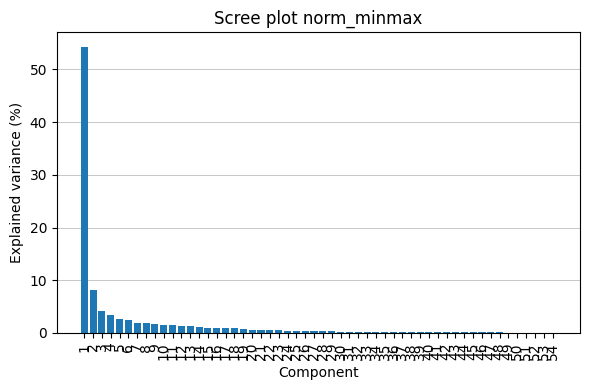

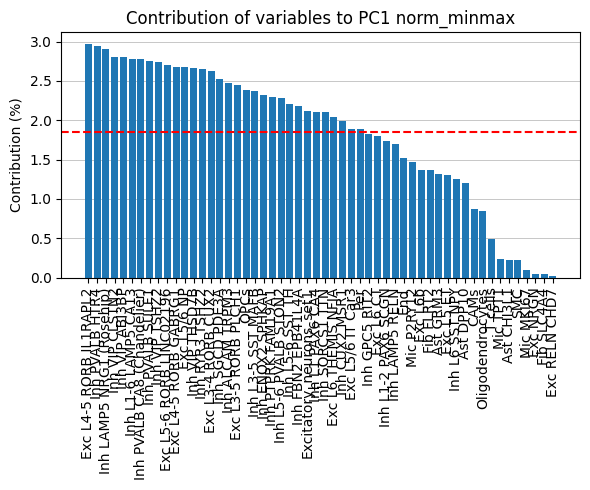

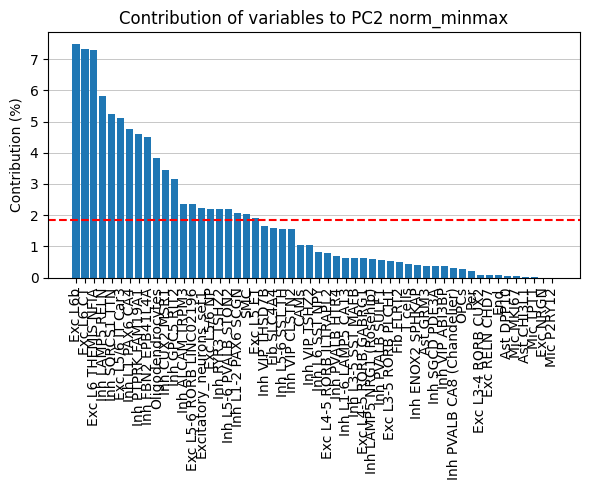

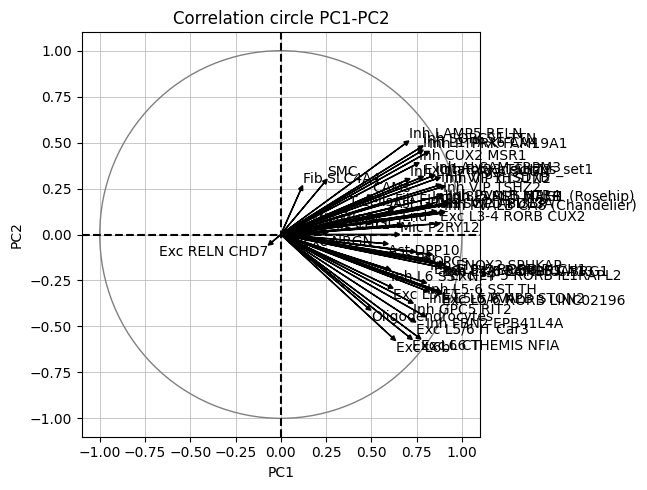

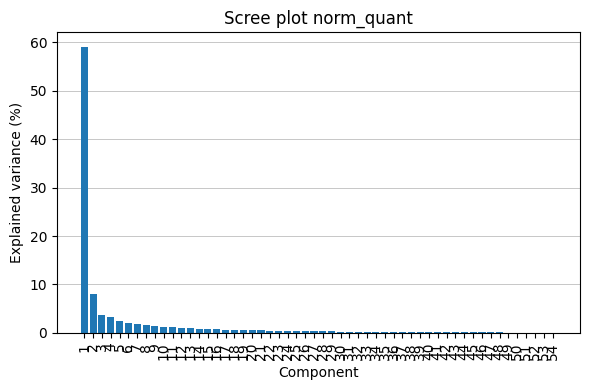

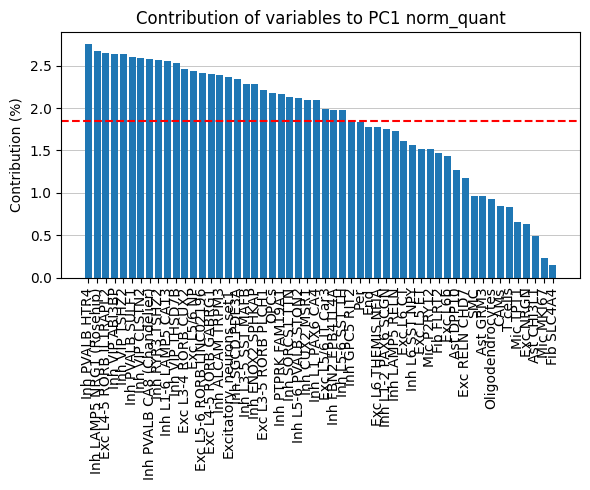

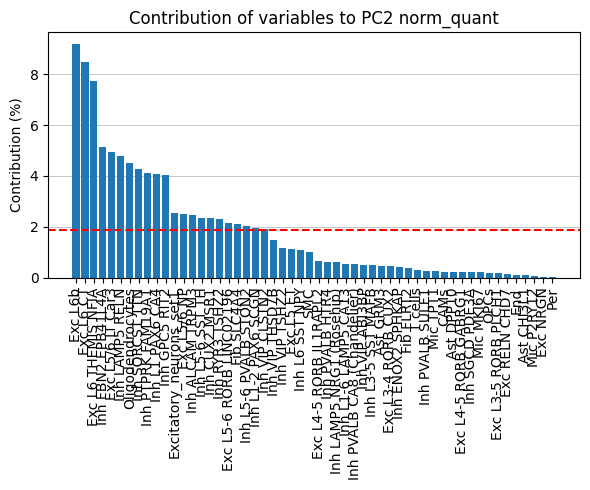

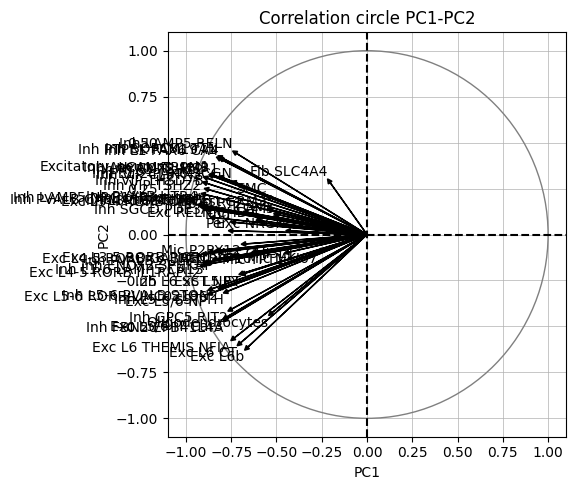

In [6]:
normalizations: list[tuple] = [(normalize_unit, 'norm_ss'), 
                               (normalize_log1p, 'norm_log1p'),
                               (normalize_minmax, 'norm_minmax'), 
                               (normalize_quantile, 'norm_quant')]

col_labels = ct_counts_metadata.var_names
X = StandardScaler().fit_transform(ct_counts_metadata.X)
model = PCA().fit(X)
pca_screeplot(model, (6, 4), 'X')

for func, layer in normalizations:
    # X is the scaled normalized value of adata.X
    func(ct_counts_metadata, layer)
    X = StandardScaler().fit_transform(ct_counts_metadata.layers[layer])

    model = PCA().fit(X)

    pca_screeplot(model, (6, 4), layer)
    pca_contribplot(model, col_labels, comp=0, title_add=layer)
    pca_contribplot(model, col_labels, comp=1, title_add=layer)
    pca_corplot(model, col_labels, comp = [0,1])